## **BBANDS (Bollinger Bands):**

   - *__Purpose__*: Bollinger Bands consist of a middle SMA line and two outer bands that indicate volatility and potential overbought/oversold conditions.
   - *__Activation and Usage__*: Use the `talib.BBANDS` function in Python. It returns upper, middle, and lower Bollinger Bands.
   - *__Strategy__*: Bands expand during high volatility and contract during low volatility. Price touching or crossing the bands can signal potential trend reversals.
   - *__Key Points__*: Monitor band squeezes (contractions) followed by expansions for potential breakouts.
   - *__Effective Conditions__*: BBANDS are useful for identifying volatility changes and potential price reversals.

The Bollinger Bands (BBANDS) indicator is a popular technical analysis tool that helps traders assess volatility and potential price reversals in a financial instrument. It consists of three lines: the upper Bollinger Band, the middle (or moving average) Band, and the lower Bollinger Band. These bands are constructed around a moving average, and their width is determined by the standard deviation of price from that moving average.

Here's an explanation of the parameters and outputs of the `talib.BBANDS` function:

**Parameters:**
1. `real`: This is the input array of prices (or any other numeric data) for which you want to calculate the Bollinger Bands. It's typically an ndarray of historical prices.

2. `timeperiod`: This parameter determines the time period used for the moving average calculation. In your case, it's set to 5. This means the indicator will use a 5-period moving average.

3. `nbdevup` and `nbdevdn`: These parameters control the width of the Bollinger Bands. The upper and lower bands are constructed by adding and subtracting a multiple of the standard deviation from the moving average, respectively. `nbdevup` specifies how many standard deviations to add to the moving average to calculate the upper band, and `nbdevdn` specifies how many standard deviations to subtract to calculate the lower band. In your case, both are set to 2, meaning the bands will be placed 2 standard deviations above and below the moving average.

4. `matype`: This parameter determines the type of moving average to be used in the calculation. The options are:
   - 0: Simple Moving Average (SMA)
   - 1: Exponential Moving Average (EMA)
   - 2: Weighted Moving Average (WMA)
   - 3: Double Exponential Moving Average (DEMA)
   - ... and more.

   In your case, it's set to 0, so the indicator will use a Simple Moving Average.

**Outputs:**
The `talib.BBANDS` function returns three output arrays:

1. `upperband`: This array contains the values of the upper Bollinger Band.

2. `middleband`: This array contains the values of the middle Bollinger Band, which is the moving average itself.

3. `lowerband`: This array contains the values of the lower Bollinger Band.

These output arrays can be used to plot the Bollinger Bands on a price chart or to analyze the price movements relative to the bands. Traders often watch for price movements that touch or cross the bands, as these events can signal potential changes in market trends or volatility.

Remember that Bollinger Bands are just one tool in a trader's toolkit, and they are typically used in conjunction with other technical indicators and analysis methods to make informed trading decisions.

In [3]:
import talib
from backtesting.test import GOOG
from backtesting import Backtest , Strategy
from backtesting.lib import crossover
import matplotlib.pyplot as plt
import pandas as pd
print(talib.BBANDS.__doc__)

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),


 BBANDS(real[, timeperiod=?, nbdevup=?, nbdevdn=?, matype=?])

    Bollinger Bands (Overlap Studies)

    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 5
        nbdevup: 2
        nbdevdn: 2
        matype: 0 (Simple Moving Average)
    Outputs:
        upperband
        middleband
        lowerband
    


In [3]:
close_prices = GOOG['Close']

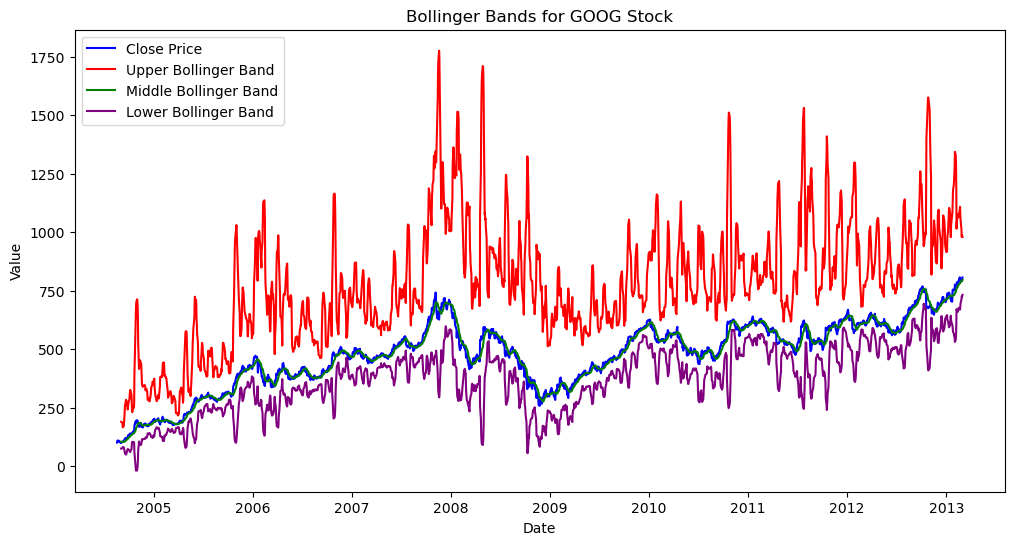

In [4]:
timeperiod = 12
nbdevup = 26
nbdevdn = 9
matype = 0

# Calculate the MACD, MACD Signal, and MACD Histogram
upperband, middleband, lowerband = talib.BBANDS(close_prices, timeperiod=timeperiod, nbdevup=nbdevup, nbdevdn=nbdevdn, matype=matype)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# Plot the Bollinger Bands
plt.plot(GOOG.index, upperband, label='Upper Bollinger Band', color='red')
plt.plot(GOOG.index, middleband, label='Middle Bollinger Band', color='green')
plt.plot(GOOG.index, lowerband, label='Lower Bollinger Band', color='purple')

# Add legend
plt.legend()

# Add title and labels
plt.title('Bollinger Bands for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

In [12]:
def optim_func(series):
    if series['# Trades'] < 15 or series['Max. Drawdown [%]'] < -10:
        return -9999
    
    eq_final = series['Equity Final [$]']
    win_rate = series['Win Rate [%]']
    return eq_final * win_rate

class BbandsStrategy(Strategy):
    timeperiod = 12
    nbdevup = 26
    nbdevdn = 9
    matype = 0

    def init(self):
        self.upperband, self.middleband, self.lowerband = self.I(talib.BBANDS, self.data.Close, self.timeperiod, self.nbdevup, self.nbdevdn, self.matype)

    def next(self):
        if crossover(self.data.Close, self.upperband):
            if not self.position:
                sl = self.data.Close *0.95
                tp = self.data.Close *1.05
                self.buy(sl = sl, tp = tp )
        elif crossover(self.lowerband, self.data.Close):
            if self.position:
                self.position.close()

bt = Backtest(GOOG, BbandsStrategy, cash=10_000, commission=0)
# stats = bt.run()
stats = bt.optimize(
    timeperiod = range(2, 18, 3),
    nbdevup = range(3, 30, 2),
    nbdevdn = range(3, 30, 2),
    # matype = range(0, 4, 1),
    maximize= optim_func)
bt.plot()
print(stats)

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 1176 configurations.
  output = _optimize_grid()
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_stats.py:122: RuntimeWarning: divide by zero encountered in scalar divide
  s.loc['Sortino Ratio'] = np.clip((annualized_return - risk_free_rate) / (np.sqrt(np.mean(day_returns.clip(-np.inf, 0)**2)) * np.sqrt(annual_trading_days)), 0, np.inf)  # noqa: E501
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_stats.py:122: RuntimeWarning: divide by zero encountered in scalar divide
  s.loc['Sortino Ratio'] = np.clip((annualized_return - risk_free_rate) / (np.sqrt(np.mean(day_returns.clip(-np.inf, 0)**2)) * np.sqrt(annual_trading_days)), 0, np.inf)  # noqa: E501
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_stats.py:122: RuntimeWarning: divide by zero encountered in scalar divide
  s.loc['Sortino

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                    0.418994
Equity Final [$]                   10445.6735
Equity Peak [$]                    10445.6735
Return [%]                           4.456735
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    0.512852
Volatility (Ann.) [%]                1.661431
Sharpe Ratio                         0.308681
Sortino Ratio                        0.747734
Calmar Ratio                         0.175047
Max. Drawdown [%]                     -2.9298
Avg. Drawdown [%]                   -1.773805
Max. Drawdown Duration        8 days 00:00:00
Avg. Drawdown Duration        7 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                         4.6913
Worst Trade [%]                        4.6913
Avg. Trade [%]                    

In [21]:
import random

def make_bbands():
    def bbands(timeperiod, nbdevup, nbdevdn, matype,  func_cala):
        def res(data):
            upperband, middleband, lowerband = talib.BBANDS(data, timeperiod=timeperiod, nbdevup=nbdevup, nbdevdn=nbdevdn, matype=matype)
            return func_cala(upperband, middleband ,lowerband)[-1]

        return res

    timeperiod = random.randrange(3, 21, 1)
    nbdevup = random.randrange(3, 21, 1)
    nbdevdn = random.randrange(3, 21, 1)
    matype = 0
    type_func = random.randrange(0, 3, 1)

    if type_func == 0:
        func_calc = lambda u, m, l: 1- ((u - m) /l)
        return bbands(timeperiod, nbdevup, nbdevdn, matype, func_calc)
    elif type_func == 1:
        func_calc = lambda u, m, l: 1- ((u - l) /m)
        return bbands(timeperiod, nbdevup, nbdevdn, matype, func_calc)
    else:
        func_calc = lambda u, m, l: 1- ((m - l) /(u - m))
        return bbands(timeperiod, nbdevup, nbdevdn, matype, func_calc)      
            
            


c = make_bbands()         
close_prices = GOOG['Close']
print(c(close_prices))

-0.25
